# Classificação

A classificação é o problema mais clássico em machine learning, contando com inúmeros algoritmos diferentes dedicados a essa classe. Os algoritmos dedicados à classificação são de aprendizagem supervisionada, pois o algoritmo aprende a partir de exemplos dados como treino, para depois tirar suas próprias conclusões de forma autônoma, e há um resultado correto esperado. Aqui, cobriremos algoritmos muito diferentes que possuem o mesmo propósito, o de obter a maior quantidade de classificações corretas no final. 

Algoritmos de classificação são vastamente utilizados atualmente, como para detecção de objetos, detecção de e-mails de SPAM, de fraudes bancárias etc. Ultimamente, a classificação e suas métricas de avaliação ganhou muito espaço por conta da pandemia, onde desejou-se classificar um paciente como portador do vírus ou não. Nesse cenário, muito discutiu-se sobre a efetividade dos testes realizados. Os mesmos conceitos usados para definir se um teste de covid é bom ou não, são utilizados para avaliar um algoritmo de classificação de machine learning.

Um detalhe importante ao escolher um algoritmo de aprendizagem supervisionada: alguns deles são para classificação binária (apenas duas classes) enquanto outros são generalizáveis para múltiplas classes. Vamos apresentar alguns a seguir.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. K-Vizinhos mais próximos (kNN)

O algoritmo K-Vizinhos mais próximos (k-Nearest Neighbours) é o primeiro e mais simples algoritmo de classificação que estudaremos. A ideia do algoritmo é classificar um dado de acordo com sua semelhança a outros dados já classificados, ou seja, dados na "vizinhança".

Na prática, um conjunto de dados já classificados é fornecido ao algoritmo e, para fazer novas classificações, o algoritmo compara o dado a ser classificado com os k dados mais parecidos, pelo método dos mínimos quadrados.



### 1.1. Importando base de dados

Imagine que uma empresa de telecomunicações deseja segmentar sua base de clientes por padrões de uso de serviço, categorizando seus clientes em 4 grupos. Se, em sua base de dados, forem identificados clientes concentrados em uma região, por exemplo, a empresa pode passar a oferecer ofertas customizadas para potenciais clientes daquela mesma região, que ainda não utilizam seus serviços. Esse é, portanto, um problema de classificação, em que os clientes da empresa possuem perfis bem estabelecidos e deseja-se saber se uma pessoa que ainda não é cliente da empresa pode se tornar, dado sua semelhança de perfil com clientes atuais.

A base de dados possui dados como: região, idade, renda, gênero etc.

O dado de interesse, segundo o qual serão realizadas as classificações, é a coluna **custcat**, que possui quatro possíveis valores:
 * 1- Serviço Básico
 * 2- Serviço Eletrônico
 * 3- Serviço Plus
 * 4- Serviço Total

Nosso objetivo é criar um classificador para prever se uma pessoa que não é cliente da empresa possuiria interesse em um desses produtos.

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

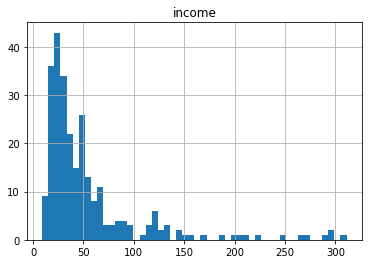

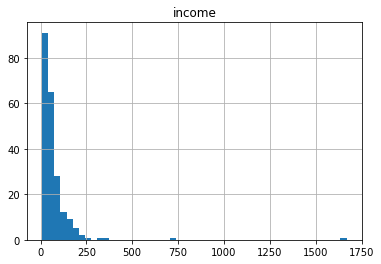

In [3]:
# Observe a diferença entre o perfil de renda do grupo 1 e do grupo 2.
df[df['custcat'] == 1].hist(column='income', bins=50)
df[df['custcat'] == 2].hist(column='income', bins=50)

### 1.2. Preparando dados de treino e teste

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Criando variáveis dependentes e independentes
X = df[['region', 'tenure','age', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
y = df['custcat'].values

# Normalizando os valores
# O link para a documentação é: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Utilizando a biblioteca sklearn para separar os dados aleatoriamente entre teste e treino
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Resultado do pré-processamento
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


### 1.3. Criando modelo

A criação de um modelo knn é extremamente simples, precisamos fornecer ao algoritmo apenas o valor de k e inserir os dados de treino e teste.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# O modelo do algoritmo vizinho mais próximo pode ser encontrado em: 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
k = 9 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

### 1.4. Avaliando modelo

Aqui, utilizaremos a métrica de precisão de classificação do algoritmo para os dados de treino e para os dados de teste.

Note que a precisão obtida é relativamente baixa, o que é comum para classificações que não possuem delimitações numéricas tão bem definidas. Além disso, foram utilizados todos os dados da base, onde um dado pouco útil tem a mesma relevância que um dado útil.

              precision    recall  f1-score   support

           1       0.33      0.45      0.38        51
           2       0.34      0.36      0.35        44
           3       0.39      0.31      0.35        54
           4       0.25      0.20      0.22        51

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.33      0.33      0.32       200



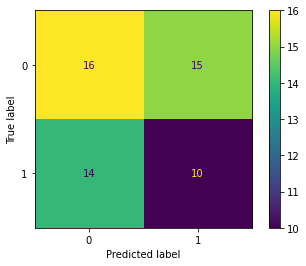

In [6]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Para avaliar o modelo, utilizaremos apenas a acurácia, dada pela função metrics.accuracy_score
# O link para a documentação é: https://scikit-learn.org/stable/modules/model_evaluation.html
print (metrics.classification_report(y_test, yhat))

# Criando matriz de confusão
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
#np.set_printoptions(precision=2)

# Exibindo matriz de confusão
disp = metrics.ConfusionMatrixDisplay(cnf_matrix)
disp.plot()

### 2. Árvores de decisão

A árvore de decisão cria um diagrama em forma de árvore, separando os dados de acordo com o quanto aquele dado minimiza o grau de entropia do sistema. 

Ou seja, se separar os dados por renda gerar grupos mais próximos de possuírem uma  classificação única, o algoritmo criará dois ramos que subdividem o grupo inicial, até chegar na classificação julgada correta pelo algoritmo. O objetivo do algoritmo é descobrir quais os valores ideais para cada nó que seja capaz de dividir a árvore em ramos e chegar na classificação correta. 

### 2.1. Importando a base de dados

Nós trabalharemos com uma base de dados gerado por uma pesquisa médica. Os dados foram coletados de diversos pacientes que sofrem da mesma doença. Durante o tratamento, cada paciente respondeu melhor a um dos 5 medicamentos, entre: Drug A, Drug B, Drug C, Drug X and Drug Y.

Seu trabalho é descobrir qual medicamento é mais apropriado para um paciente futuro que possui as mesmas características e mesma doença. A base de dados contém dados sobre Idade (Age), Sexo (Sex), Pressão Sanguínea (BP) e Colesterol (Cholesterol). A variável dependente é o medicamento ao qual cada paciente respondeu melhor.

In [7]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### 2.2. Pré-processando a base

Para que o algoritmo seja capaz de encontrar os melhores parâmetros e criar a árvore de decisão, os dados recebidos precisam ser todos numéricos. Então o código abaixo transforma todos as categorias de strings para inteiros.

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Definindo quais serão as variáveis dependente e independentes
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = my_data["Drug"]

# Transformando dados categóricos em numéricos com a função 'LabelEncoder', que realiza o processo automaticamente
# O link para a documentação é: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le_sex = preprocessing.LabelEncoder().fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 
le_BP = preprocessing.LabelEncoder().fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])
le_Chol = preprocessing.LabelEncoder().fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

# Separando os dados entre dados de treino e teste com a função 'train_test_split' que realiza o processo automaticamente
# O link para a documentação é: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

### 2.3. Criando o modelo

In [9]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# O modelo da árvore de decisão pode ser encontrado em: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)

### 2.4. Avaliando e Visualizando resultados

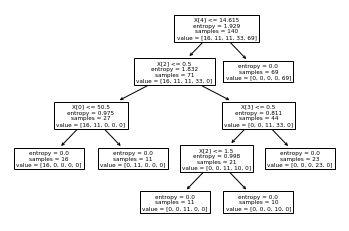

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [10]:
# A biblioteca também fornece uma forma de visualizar o resultado automaticamente, com a função plot_tree, disponível em:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
tree.plot_tree(drugTree)
plt.show()

# Exibindo relatório com métricas de avaliação
print (metrics.classification_report(y_testset, predTree))

# Obs: Nesse caso, não será gerada a matriz de confusão porque existem mais de duas classificações possíveis

### 3. Regressão Logística

Apesar de possuir o nome de regressão e utilizar um regressor para traçar uma curva, a regressão logística é um algoritmo para classificação. Os valores encontrados na regressão são interpretados como probabilidades, após predizer a probabilidade de um dado ponto ter classe positiva, o algoritmo precisa classificar esse ponto. Para fazer isso, simplesmente escolhemos a classe mais provável: se p > 0,5, a classe predita é positiva; caso contrário, é negativa. Assim como em uma regressão comum, o objetivo do algoritmo é encontrar os melhores coeficientes para traçar a curva ideal que se adeque aos dados.

### 3.1. Importando a base de dados

Utilizaremos uma base de dados de uma empresa de telecomunicações para prever cancelamentos de serviço. Cada linha representa um consumidor. Tendo em vista que a empresa deseja manter seus clientes, o foco da análise é prever consumidores com maior probabilidade de permanecer na empresa, com o objetivo de ajudar a prever qual comportamento ajudará a reter os consumidores.

A base contém informações sobre:
* Consumidores que deixaram no último mês ('churn')
* Serviços que cada consumidor assinou - telefone, itens múltiplos, internet, segurança online, backup online, proteção de dispositivo, suporte e streaming.
* Conta do usuário - quanto tempo é cliente, contrato, método de pagamento etc.
* Dados pessoais - gênero, faixa de idade, se possuem cônjugue.

In [11]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### 3.2. Pré-processando a base

In [12]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

# Definindo as variáveis dependentes e independentes
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

# Normalizando os valores
X = preprocessing.StandardScaler().fit(X).transform(X)

# Dividindo entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### 3.3. Criando modelo



In [13]:
from sklearn.linear_model import LogisticRegression

# O modelo de Regressão Logística pode ser encontrado em: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

### 3.4. Avaliando e Visualizando Resultados

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



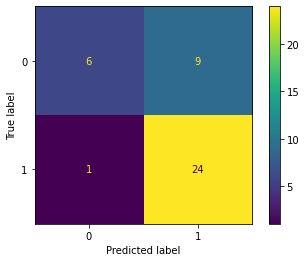

In [14]:
# Criando a matriz de confusão
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Criando visualização da matriz obtida
disp = metrics.ConfusionMatrixDisplay(cnf_matrix)
disp.plot()

# Imprimindo também um relatório com algumas métricas de avaliação
print (metrics.classification_report(y_test, yhat))

### 4. Máquina de vetores de suporte (SVM)

Nesse algoritmo, plotamos cada item de dados como um ponto no espaço
n-dimensional (onde n é o número de recursos que você tem), com o valor de cada recurso sendo o valor de uma determinada coordenada. 

O algoritmo SVM é responsável por encontrar a melhor fronteira de separação entre classes/rótulos possível para um dado conjunto de dados que sejam linearmente separáveis. Para o SVM, as diversas fronteiras de separação possíveis que são capazes de separar completamente as classes são chamadas de **hiperplanos.**

Dessa forma, o SVM busca encontrar o melhor hiperplano para um dado *data set* 
cujas classes são linearmente separáveis. A mesma ideia utilizada para um espaço tridimensional pode ser expandida para N dimensões quaisquer, e a grande vantagem do SVM é de ser muito eficiente para um grande conjunto de dados diferentes, ou seja, de ser facilmente generalizável para encontrar hiperplanos em um espaço N-dimensional.

### 4.1. Importando base de dados

A base de dados que utilizaremos contém dados sobre centenas de células humanas, em que cada uma possui diversas características, são elas:

| Nome da coluna  | Descrição                 |
| -----------     | --------------------------- |
| Clump           | Espessura das células             |
| UnifSize        | Uniformidade no tamanho da célula     |
| UnifShape       | Uniformidade no formato da célula    |
| MargAdh         | Adesão Marginal           |
| SingEpiSize     | Tamanho individual da célula epitelial |
| BareNuc         | Bare nuclei                 |
| BlandChrom      | Bland chromatin             |
| NormNucl        | Normal nucleoli             |
| Mit            | Mitose                  |
| Class       | Benigno ou Maligno         |

O objetivo do algoritmo é prever se uma determinada célula é benigna ou maligna, com base nas informações sobre a célula.

In [15]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 4.2. Realizando pré-processamento

In [16]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

# Definindo variáveis dependentes e independentes
X = np.asarray(cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
y = np.asarray(cell_df['Class'].astype('int'))

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### 4.3. Aplicando modelo

In [17]:
from sklearn import svm

# O modelo de Regressão Logística pode ser encontrado em:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)

### 4.4. Avaliando e Visualizando modelo

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



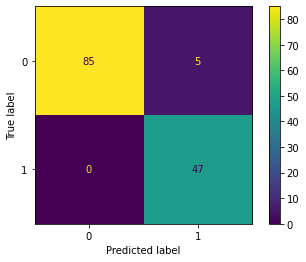

In [18]:
# Criando matriz de confusão
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

# Exibindo matriz de confusão
disp = metrics.ConfusionMatrixDisplay(cnf_matrix)
disp.plot()

# Gerando relatório automático com algumas métricas
print (metrics.classification_report(y_test, yhat))